# Loading Data from Various Sources

This notebook demonstrates different methods for loading data from various file formats including CSV, Excel, JSON, and remote data sources. We'll cover different options and parameters for each method, as well as how to handle various challenges like different encodings and large files.

## 1. Import Required Libraries

We'll start by importing the necessary libraries for loading and manipulating data from various sources.

In [1]:
# Import basic data manipulation libraries
import pandas as pd
import numpy as np

# Libraries for handling file formats and remote data
import json
import requests
import io
import os
from pathlib import Path

# For handling Excel files
import openpyxl
import xlrd

# For timing operations
import time

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Loading Data from CSV Files

CSV (Comma-Separated Values) is one of the most common formats for storing tabular data. Pandas provides the powerful `read_csv()` function with many options to handle various CSV formats.

In [2]:
# Basic CSV loading
# Let's download the Iris dataset as an example
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
iris_df = pd.read_csv(url)

# Display the first few rows
print("Basic CSV loading:")
print(f"Shape: {iris_df.shape}")
print(iris_df.head())

Basic CSV loading:
Shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# CSV with different delimiters
# Create a sample semicolon-separated string
csv_data = """sepal_length;sepal_width;petal_length;petal_width;species
5.1;3.5;1.4;0.2;setosa
4.9;3.0;1.4;0.2;setosa
4.7;3.2;1.3;0.2;setosa"""

# Write to a temporary file
with open("temp_semicolon.csv", "w") as f:
    f.write(csv_data)

# Read with custom delimiter
semi_df = pd.read_csv("temp_semicolon.csv", delimiter=";")
print("CSV with semicolon delimiter:")
print(semi_df.head())

CSV with semicolon delimiter:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


In [4]:
# CSV with additional options
# Create a sample CSV with header issues and missing values
csv_data = """# This is a comment
# This is another comment
col1,col2,col3
1,2,3
4,,6
7,8,"""

# Write to a temporary file
with open("temp_complex.csv", "w") as f:
    f.write(csv_data)

# Read with various options
complex_df = pd.read_csv("temp_complex.csv", 
                         comment="#",       # Skip lines starting with #
                         skiprows=0,        # Don't skip any non-comment rows
                         na_values=[""],    # Treat empty strings as NaN
                         )

print("CSV with comments and missing values:")
print(complex_df)
print("\nData types:")
print(complex_df.dtypes)

# Clean up temporary files
# os.remove("temp_semicolon.csv")
# os.remove("temp_complex.csv")

CSV with comments and missing values:
   col1  col2  col3
0     1   2.0   3.0
1     4   NaN   6.0
2     7   8.0   NaN

Data types:
col1      int64
col2    float64
col3    float64
dtype: object


In [5]:
# Reading large CSV files in chunks
# Download a larger dataset (COVID-19 data)

# # [ERROR] HTTPError: HTTP Error 404: Not Found
# url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-01-2023.csv"
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-01-2023.csv"

# Read in chunks of 1000 rows
chunk_size = 1000
chunks = []

start_time = time.time()
for chunk in pd.read_csv(url, chunksize=chunk_size):
    # Process each chunk (for example, filter only certain countries)
    filtered_chunk = chunk[chunk['Country_Region'].isin(['US', 'India', 'Brazil', 'United Kingdom'])]
    chunks.append(filtered_chunk)

# Combine all chunks into a single DataFrame
covid_df = pd.concat(chunks)
end_time = time.time()

print(f"Large CSV loaded and processed in chunks in {end_time - start_time:.2f} seconds")
print(f"Shape: {covid_df.shape}")
print(covid_df.head())

Large CSV loaded and processed in chunks in 0.33 seconds
Shape: (3362, 14)
    FIPS Admin2 Province_State Country_Region          Last_Update      Lat  \
42   NaN    NaN           Acre         Brazil  2023-03-02 04:21:02  -9.0238   
43   NaN    NaN        Alagoas         Brazil  2023-03-02 04:21:02  -9.5713   
44   NaN    NaN          Amapa         Brazil  2023-03-02 04:21:02   0.9020   
45   NaN    NaN       Amazonas         Brazil  2023-03-02 04:21:02  -3.4168   
46   NaN    NaN          Bahia         Brazil  2023-03-02 04:21:02 -12.5797   

      Long_  Confirmed  Deaths  Recovered  Active      Combined_Key  \
42 -70.8120     160387    2043        NaN     NaN      Acre, Brazil   
43 -36.7820     337478    7242        NaN     NaN   Alagoas, Brazil   
44 -52.0030     185589    2167        NaN     NaN     Amapa, Brazil   
45 -65.8561     631312   14439        NaN     NaN  Amazonas, Brazil   
46 -41.7007    1792003   31456        NaN     NaN     Bahia, Brazil   

    Incident_Rate  Case

In [6]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

chunk_size = 100000
chunks = []

start_time = time.time()
for chunk in pd.read_csv(url, chunksize=chunk_size):
    # Filter chunk for selected countries
    filtered_chunk = chunk[chunk['location'].isin(['United States', 'India', 'Brazil', 'United Kingdom'])]
    chunks.append(filtered_chunk)

# Combine all filtered chunks
covid_df = pd.concat(chunks)
end_time = time.time()

print(f"Large CSV loaded and processed in chunks in {end_time - start_time:.2f} seconds")
print(f"Shape: {covid_df.shape}")
print(covid_df.head())

Large CSV loaded and processed in chunks in 31.62 seconds
Shape: (6704, 67)
      iso_code      continent location        date  total_cases  new_cases  \
50234      BRA  South America   Brazil  2020-01-05          0.0        0.0   
50235      BRA  South America   Brazil  2020-01-06          0.0        0.0   
50236      BRA  South America   Brazil  2020-01-07          0.0        0.0   
50237      BRA  South America   Brazil  2020-01-08          0.0        0.0   
50238      BRA  South America   Brazil  2020-01-09          0.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
50234                 NaN           0.0         0.0                  NaN  ...   
50235                 NaN           0.0         0.0                  NaN  ...   
50236                 NaN           0.0         0.0                  NaN  ...   
50237                 NaN           0.0         0.0                  NaN  ...   
50238                 NaN           0.0         0.

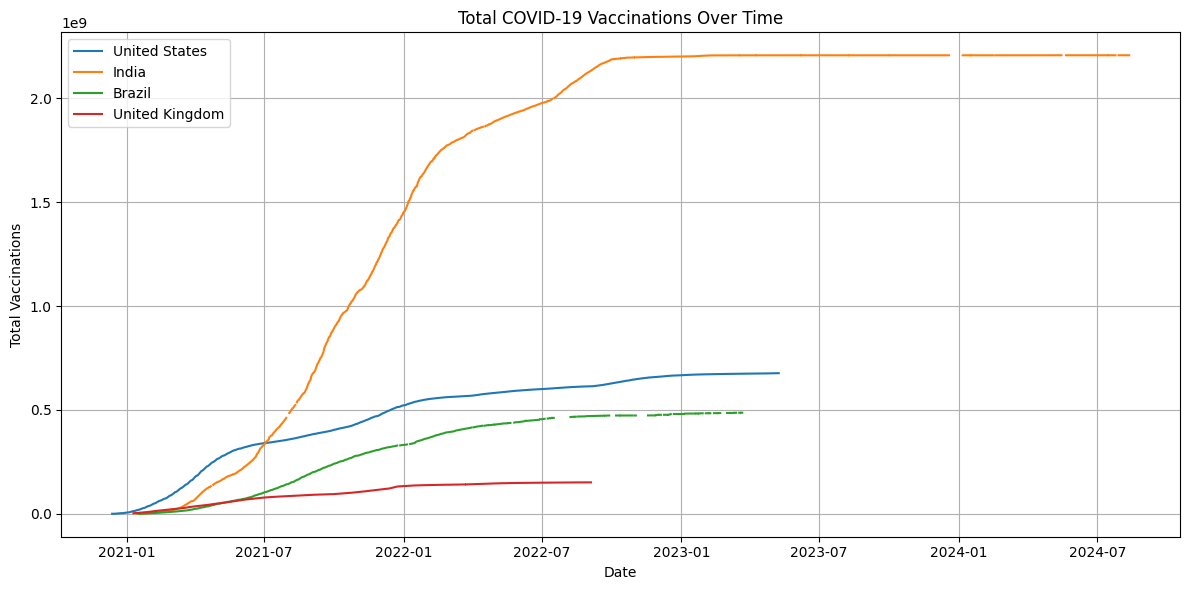

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, parse_dates=['date'])

# Filter for selected countries
countries = ['United States', 'India', 'Brazil', 'United Kingdom']
filtered_df = df[df['location'].isin(countries)]

# Plot total vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Loading Data from Excel Files

Excel files are widely used in business and can contain multiple sheets of data. Pandas makes it easy to read Excel files with the `read_excel()` function.

In [8]:
# Let's create a sample Excel file with multiple sheets
data1 = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
         'Age': [28, 34, 29, 42],
         'City': ['New York', 'Paris', 'Berlin', 'London']}

data2 = {'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor'],
         'Price': [1200, 800, 500, 300],
         'Stock': [10, 25, 15, 8]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Write to Excel file with multiple sheets
excel_file = "sample_data_2.xlsx"
with pd.ExcelWriter(excel_file) as writer:
    df1.to_excel(writer, sheet_name='People', index=False)
    df2.to_excel(writer, sheet_name='Products', index=False)

print(f"Sample Excel file created: {excel_file}")

Sample Excel file created: sample_data_2.xlsx


In [9]:
# Reading a specific sheet
people_df = pd.read_excel(excel_file, sheet_name='People')
print("Data from 'People' sheet:")
print(people_df)

# Reading all sheets as a dictionary of DataFrames
all_sheets = pd.read_excel(excel_file, sheet_name=None)
print("\nAll sheets loaded as dictionary:")
for sheet_name, df in all_sheets.items():
    print(f"\nSheet: {sheet_name}")
    print(df)

Data from 'People' sheet:
    Name  Age      City
0   John   28  New York
1   Anna   34     Paris
2  Peter   29    Berlin
3  Linda   42    London

All sheets loaded as dictionary:

Sheet: People
    Name  Age      City
0   John   28  New York
1   Anna   34     Paris
2  Peter   29    Berlin
3  Linda   42    London

Sheet: Products
   Product  Price  Stock
0   Laptop   1200     10
1    Phone    800     25
2   Tablet    500     15
3  Monitor    300      8


In [10]:
# Reading specific cells or ranges
# Read only specific columns
products_subset = pd.read_excel(excel_file, 
                                sheet_name='Products',
                                usecols=['Product', 'Price'])
print("Specific columns from Products sheet:")
print(products_subset)

# Read specific rows
products_rows = pd.read_excel(excel_file, 
                              sheet_name='Products',
                              skiprows=1,     # Skip header
                              nrows=2)        # Read only 2 rows
print("\nSpecific rows from Products sheet:")
print(products_rows)

Specific columns from Products sheet:
   Product  Price
0   Laptop   1200
1    Phone    800
2   Tablet    500
3  Monitor    300

Specific rows from Products sheet:
   Laptop  1200  10
0   Phone   800  25
1  Tablet   500  15


## 4. Loading Data from JSON Files

JSON (JavaScript Object Notation) is a popular data interchange format. It can represent complex, nested data structures, which pandas can parse into DataFrames.

In [11]:
# Create sample JSON data
json_data = """
{
    "employees": [
        {"name": "John", "age": 30, "city": "New York", "skills": ["Python", "SQL"]},
        {"name": "Alice", "age": 25, "city": "San Francisco", "skills": ["JavaScript", "React"]},
        {"name": "Bob", "age": 35, "city": "Chicago", "skills": ["Java", "C++", "Python"]}
    ],
    "company": "Tech Solutions Inc.",
    "founded": 2010
}
"""

# Write JSON to file
with open("sample_data_2.json", "w") as f:
    f.write(json_data)

# Parse JSON using the json module
with open("sample_data_2.json", "r") as f:
    data = json.load(f)

print("JSON data loaded with json module:")
print(f"Company: {data['company']}")
print(f"Number of employees: {len(data['employees'])}")
print(f"First employee: {data['employees'][0]}")

JSON data loaded with json module:
Company: Tech Solutions Inc.
Number of employees: 3
First employee: {'name': 'John', 'age': 30, 'city': 'New York', 'skills': ['Python', 'SQL']}


In [12]:
# # Load JSON data into pandas DataFrame
# # For simple JSON structures
# simple_df = pd.read_json("""
# [
#     {"name": "John", "age": 30, "city": "New York"},
#     {"name": "Alice", "age": 25, "city": "San Francisco"},
#     {"name": "Bob", "age": 35, "city": "Chicago"}
# ]
# """)

# print("Simple JSON loaded into DataFrame:")
# print(simple_df)

# # For nested JSON - we need to normalize it
# employees_df = pd.json_normalize(data['employees'])
# print("\nNested JSON normalized into DataFrame:")
# print(employees_df)

```
FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
```

In [13]:
import pandas as pd
from io import StringIO

# Load JSON data into pandas DataFrame
# For simple JSON structures
simple_json = StringIO("""
[
    {"name": "John", "age": 30, "city": "New York"},
    {"name": "Alice", "age": 25, "city": "San Francisco"},
    {"name": "Bob", "age": 35, "city": "Chicago"}
]
""")
simple_df = pd.read_json(simple_json)

print("Simple JSON loaded into DataFrame:")
print(simple_df)

# For nested JSON - we need to normalize it
# Assuming this is your nested JSON:
data = {
    "employees": [
        {"name": "John", "details": {"age": 30, "city": "New York"}},
        {"name": "Alice", "details": {"age": 25, "city": "San Francisco"}},
        {"name": "Bob", "details": {"age": 35, "city": "Chicago"}}
    ]
}

employees_df = pd.json_normalize(data['employees'])
print("\nNested JSON normalized into DataFrame:")
print(employees_df)

Simple JSON loaded into DataFrame:
    name  age           city
0   John   30       New York
1  Alice   25  San Francisco
2    Bob   35        Chicago

Nested JSON normalized into DataFrame:
    name  details.age   details.city
0   John           30       New York
1  Alice           25  San Francisco
2    Bob           35        Chicago


In [14]:
# JSON with nested arrays and objects
# Fetch posts from JSONPlaceholder API
response = requests.get('https://jsonplaceholder.typicode.com/posts')
posts_data = response.json()

# Convert to DataFrame
posts_df = pd.DataFrame(posts_data)
print("API JSON data loaded into DataFrame:")
print(posts_df.head())

# Get user data for each post
response = requests.get('https://jsonplaceholder.typicode.com/users')
users_data = response.json()
users_df = pd.DataFrame(users_data)

# Create a simplified users reference dataframe
users_simple = users_df[['id', 'name', 'email']]

# Join posts with user info
posts_with_users = posts_df.merge(users_simple, left_on='userId', right_on='id', suffixes=('_post', '_user'))
print("\nJoined data from multiple JSON sources:")
print(posts_with_users[['id_post', 'title', 'name', 'email']].head())

API JSON data loaded into DataFrame:
   userId  id                                              title  \
0       1   1  sunt aut facere repellat provident occaecati e...   
1       1   2                                       qui est esse   
2       1   3  ea molestias quasi exercitationem repellat qui...   
3       1   4                               eum et est occaecati   
4       1   5                                 nesciunt quas odio   

                                                body  
0  quia et suscipit\nsuscipit recusandae consequu...  
1  est rerum tempore vitae\nsequi sint nihil repr...  
2  et iusto sed quo iure\nvoluptatem occaecati om...  
3  ullam et saepe reiciendis voluptatem adipisci\...  
4  repudiandae veniam quaerat sunt sed\nalias aut...  

Joined data from multiple JSON sources:
   id_post                                              title           name  \
0        1  sunt aut facere repellat provident occaecati e...  Leanne Graham   
1        2             

## 5. Handling Different File Encodings

Files can come with different encodings, especially when dealing with international data. Let's see how to handle various encoding issues.

In [15]:
# Create sample data with non-ASCII characters
text_data = """column1,column2,column3
1,2,café
4,5,résumé
7,8,spaß
"""

# Write with different encodings
encodings = ['utf-8', 'latin-1', 'cp1252']
for encoding in encodings:
    with open(f"encoding_{encoding}.csv", "w", encoding=encoding) as f:
        f.write(text_data)
    
    # Try to read it back
    try:
        df = pd.read_csv(f"encoding_{encoding}.csv")
        print(f"Successfully read with default encoding from file encoded as {encoding}:")
        print(df)
    except UnicodeDecodeError:
        print(f"Failed to read with default encoding from file encoded as {encoding}")
        
        # Try with explicit encoding
        df = pd.read_csv(f"encoding_{encoding}.csv", encoding=encoding)
        print(f"Successfully read with explicit {encoding} encoding:")
        print(df)

# Clean up files
# for encoding in encodings:
    # os.remove(f"encoding_{encoding}.csv")

Successfully read with default encoding from file encoded as utf-8:
   column1  column2 column3
0        1        2    café
1        4        5  résumé
2        7        8    spaß
Failed to read with default encoding from file encoded as latin-1
Successfully read with explicit latin-1 encoding:
   column1  column2 column3
0        1        2    café
1        4        5  résumé
2        7        8    spaß
Failed to read with default encoding from file encoded as cp1252
Successfully read with explicit cp1252 encoding:
   column1  column2 column3
0        1        2    café
1        4        5  résumé
2        7        8    spaß


## 6. Working with Remote Data Sources

Many datasets are available online through URLs and APIs. Let's explore how to load data directly from remote sources.

In [16]:
# Reading directly from URLs
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
airlines_df = pd.read_csv(url)

print("Data loaded directly from GitHub URL:")
print(f"Shape: {airlines_df.shape}")
print(airlines_df.head())

Data loaded directly from GitHub URL:
Shape: (56, 8)
                 airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  
0                      0                 0  
1                      1                88  
2                 

In [17]:
# Loading data from an API
# Let's use the Open Notify API to get the current position of the ISS
response = requests.get("http://api.open-notify.org/iss-now.json")
iss_data = response.json()

print("Data from API:")
print(json.dumps(iss_data, indent=4))

# Convert to DataFrame
iss_df = pd.DataFrame({
    'timestamp': [iss_data['timestamp']],
    'latitude': [float(iss_data['iss_position']['latitude'])],
    'longitude': [float(iss_data['iss_position']['longitude'])]
})
iss_df['datetime'] = pd.to_datetime(iss_df['timestamp'], unit='s')

print("\nConverted to DataFrame:")
print(iss_df)

Data from API:
{
    "timestamp": 1744734886,
    "message": "success",
    "iss_position": {
        "latitude": "-44.8389",
        "longitude": "35.7556"
    }
}

Converted to DataFrame:
    timestamp  latitude  longitude            datetime
0  1744734886  -44.8389    35.7556 2025-04-15 16:34:46


In [18]:
# Loading data in memory without saving to disk
url = "https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv"
response = requests.get(url)

# If the response was successful, create a file-like object in memory
if response.status_code == 200:
    # Create a file-like object from the response content
    csv_file = io.StringIO(response.text)
    
    # Read the CSV into a pandas DataFrame
    states_df = pd.read_csv(csv_file)
    
    print("CSV loaded in memory without saving to disk:")
    print(f"Shape: {states_df.shape}")
    print(states_df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")

CSV loaded in memory without saving to disk:
Shape: (52, 4)
   Rank       State Postal  Population
0     1     Alabama     AL   4849377.0
1     2      Alaska     AK    736732.0
2     3     Arizona     AZ   6731484.0
3     4    Arkansas     AR   2966369.0
4     5  California     CA  38802500.0


## 7. Comparing Data Loading Methods

Let's compare the performance of different loading methods, especially for larger datasets.

In [19]:
# Download a larger dataset for benchmarking
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/diamonds.csv"
diamonds_path = "diamonds.csv"

# Download the file only if it doesn't exist
if not os.path.exists(diamonds_path):
    response = requests.get(url)
    with open(diamonds_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {diamonds_path}")
else:
    print(f"{diamonds_path} already exists")

# Get file size
file_size = os.path.getsize(diamonds_path) / (1024 * 1024)  # Convert to MB
print(f"File size: {file_size:.2f} MB")

diamonds.csv already exists
File size: 2.63 MB


In [20]:
# Benchmark different loading methods

# Method 1: Standard read_csv
start_time = time.time()
df_standard = pd.read_csv(diamonds_path)
standard_time = time.time() - start_time
print(f"Standard read_csv: {standard_time:.3f} seconds")

# Method 2: Using specific dtypes for columns
dtypes = {
    'carat': 'float32', 
    'depth': 'float32', 
    'table': 'float32', 
    'price': 'int32', 
    'x': 'float32',
    'y': 'float32',
    'z': 'float32'
}

start_time = time.time()
df_dtypes = pd.read_csv(diamonds_path, dtype=dtypes)
dtypes_time = time.time() - start_time
print(f"With specified dtypes: {dtypes_time:.3f} seconds")

# Method 3: Using chunking
start_time = time.time()
chunks = []
for chunk in pd.read_csv(diamonds_path, chunksize=5000):
    chunks.append(chunk)
df_chunked = pd.concat(chunks)
chunk_time = time.time() - start_time
print(f"Using chunks: {chunk_time:.3f} seconds")

# Compare memory usage
print("\nMemory usage:")
print(f"Standard: {df_standard.memory_usage().sum() / 1024**2:.2f} MB")
print(f"With dtypes: {df_dtypes.memory_usage().sum() / 1024**2:.2f} MB")
print(f"Chunked: {df_chunked.memory_usage().sum() / 1024**2:.2f} MB")

Standard read_csv: 0.059 seconds
With specified dtypes: 0.062 seconds
Using chunks: 0.107 seconds

Memory usage:
Standard: 4.53 MB
With dtypes: 3.09 MB
Chunked: 4.53 MB


## 8. Saving Data to Different Formats

After loading and processing data, you often need to save it in different formats. Let's see how to convert between formats.

In [21]:
# Let's use the airlines dataset we loaded earlier
# First, let's look at the data
print("Airlines dataset:")
print(airlines_df.head())

# Save to CSV
airlines_df.to_csv("airlines_exported.csv", index=False)
print("\nSaved to airlines_exported.csv")

# Save to Excel
airlines_df.to_excel("airlines_exported.xlsx", sheet_name="Safety Data", index=False)
print("Saved to airlines_exported.xlsx")

# Save to JSON
airlines_df.to_json("airlines_exported.json", orient="records")
print("Saved to airlines_exported.json")

# Save to pickle (Python serialized format)
airlines_df.to_pickle("airlines_exported.pkl")
print("Saved to airlines_exported.pkl")

# Save to parquet (columnar storage format - good for big data)
airlines_df.to_parquet("airlines_exported.parquet")
print("Saved to airlines_exported.parquet")

# Compare file sizes
files = [
    "airlines_exported.csv",
    "airlines_exported.xlsx", 
    "airlines_exported.json",
    "airlines_exported.pkl",
    "airlines_exported.parquet"
]

print("\nFile size comparison:")
for file in files:
    size_kb = os.path.getsize(file) / 1024
    print(f"{file}: {size_kb:.2f} KB")

Airlines dataset:
                 airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  
0                      0                 0  
1                      1                88  
2                      0                 0  
3       

In [22]:
# Load the data back from these formats to verify
csv_df = pd.read_csv("airlines_exported.csv")
excel_df = pd.read_excel("airlines_exported.xlsx")
json_df = pd.read_json("airlines_exported.json", orient="records")
pickle_df = pd.read_pickle("airlines_exported.pkl")
parquet_df = pd.read_parquet("airlines_exported.parquet")

# Check that all the data is the same
formats = {
    "Original": airlines_df,
    "CSV": csv_df,
    "Excel": excel_df,
    "JSON": json_df,
    "Pickle": pickle_df,
    "Parquet": parquet_df
}

print("Verifying data integrity across formats:")
for name, df in formats.items():
    print(f"{name} shape: {df.shape}")

# Clean up files
# for file in files:
    # os.remove(file)
# os.remove(diamonds_path)
# os.remove(excel_file)
# os.remove("sample_data_2.json")

print("\nTemporary files cleaned up")

Verifying data integrity across formats:
Original shape: (56, 8)
CSV shape: (56, 8)
Excel shape: (56, 8)
JSON shape: (56, 8)
Pickle shape: (56, 8)
Parquet shape: (56, 8)

Temporary files cleaned up


## 9. Summary and Best Practices

In this notebook, we've explored various methods to load data from different file formats:

1. **CSV files** - Using `pd.read_csv()` with various options for delimiters, encodings, and chunking
2. **Excel files** - Using `pd.read_excel()` to read specific sheets and ranges
3. **JSON files** - Using `pd.read_json()` and `json.load()` for different JSON structures
4. **Remote data** - Loading data directly from URLs and APIs
5. **Different encodings** - Handling files with various character encodings
6. **Performance optimizations** - Using dtypes and chunking for faster loading
7. **Saving data** - Converting between different file formats

### Best Practices:

- **Specify dtypes** when loading large datasets to reduce memory usage
- **Use chunking** for very large files that don't fit in memory
- **Handle encodings explicitly** when working with international data
- **Consider compression** for large files (e.g., `pd.read_csv("file.csv.gz")`)
- **Use appropriate file formats** for your use case (Parquet for large data, CSV for compatibility)
- **Include error handling** when loading from remote sources